In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
table_data = pd.read_csv(r"C:\Users\Julio Lage\Documents\GitHub\Campeao-Brasileirao-2025\DATA\table.csv")

In [34]:
table_data.columns

Index(['Unnamed: 0', 'season', 'place', 'team', 'points', 'played', 'won',
       'draw', 'loss', 'goals', 'goals_taken', 'goals_diff', 'wins_percent',
       'draw_percent', 'loss_percent'],
      dtype='object')

In [35]:
table_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    450 non-null    int64  
 1   season        450 non-null    int64  
 2   place         450 non-null    int64  
 3   team          450 non-null    object 
 4   points        450 non-null    int64  
 5   played        450 non-null    int64  
 6   won           450 non-null    int64  
 7   draw          450 non-null    int64  
 8   loss          450 non-null    int64  
 9   goals         450 non-null    int64  
 10  goals_taken   450 non-null    int64  
 11  goals_diff    450 non-null    int64  
 12  wins_percent  450 non-null    float64
 13  draw_percent  450 non-null    float64
 14  loss_percent  450 non-null    float64
dtypes: float64(3), int64(11), object(1)
memory usage: 52.9+ KB


In [36]:
table_data = table_data.drop(['Unnamed: 0'], axis= 1 )

In [59]:
table_data

,season,place,team,points,played,won,draw,loss,goals,goals_taken,goals_diff,wins_percent,draw_percent,loss_percent
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,67.39,15.22,17.39
1,2003,2,Santos,87,46,25,12,9,93,60,33,54.35,26.09,19.57
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,47.83,26.09,26.09
3,2003,4,São Caetano,74,46,19,14,13,53,37,16,41.30,30.43,28.26
4,2003,5,Coritiba,73,46,21,10,15,67,58,9,45.65,21.74,32.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2024,16,Red Bull Bragantino,44,38,10,14,14,44,48,-4,26.32,36.84,36.84
446,2024,17,Athletico Paranaense,42,38,11,9,18,40,46,-6,28.95,23.68,47.37
447,2024,18,Criciúma,38,38,9,11,18,42,61,-19,23.68,28.95,47.37
448,2024,19,Atlético Goianiense,30,38,7,9,22,29,58,-29,18.42,23.68,57.89


In [38]:
table_data.empty

False

In [39]:
table_data[table_data['place'] == 1].groupby('team').size()


team
Atlético Mineiro    1
Botafogo            1
Corinthians         4
Cruzeiro            3
Flamengo            3
Fluminense          2
Palmeiras           4
Santos              1
São Paulo           3
dtype: int64

In [55]:
# Soma os gols feitos por cada time
goals_per_team = table_data.groupby('team')['goals'].sum().sort_values(ascending=False)

print(goals_per_team)


team
Flamengo                1230
São Paulo               1216
Atlético Mineiro        1178
Santos                  1178
Palmeiras               1137
Fluminense              1131
Internacional           1095
Athletico Paranaense    1073
Grêmio                  1063
Cruzeiro                1055
Corinthians             1053
Botafogo                 935
Vasco                    830
Goiás                    789
Coritiba                 693
Vitória                  537
Figueirense              530
Bahia                    529
Sport                    463
Fortaleza                427
Ponte Preta              414
Juventude                381
Atlético Goianiense      317
Paraná                   312
Ceará                    277
Avaí                     274
Chapecoense              261
Red Bull Bragantino      247
Criciúma                 237
América Mineiro          227
Náutico                  224
São Caetano              209
Paysandu                 193
Guarani                  140
Portugues

In [56]:
goals_per_team = table_data.groupby('team')['goals_taken'].sum().sort_values(ascending=False)

print(goals_per_team)

team
Fluminense              1071
Atlético Mineiro        1035
Athletico Paranaense    1011
Flamengo                1004
Santos                   982
Vasco                    937
São Paulo                922
Botafogo                 910
Cruzeiro                 891
Internacional            889
Grêmio                   884
Corinthians              877
Palmeiras                873
Goiás                    839
Coritiba                 787
Vitória                  633
Figueirense              622
Bahia                    614
Sport                    568
Ponte Preta              534
Juventude                498
Fortaleza                460
Atlético Goianiense      421
Avaí                     415
Paraná                   369
Chapecoense              362
América Mineiro          332
Criciúma                 327
Náutico                  318
Ceará                    317
Paysandu                 245
Red Bull Bragantino      228
São Caetano              199
Guarani                  180
Cuiabá   

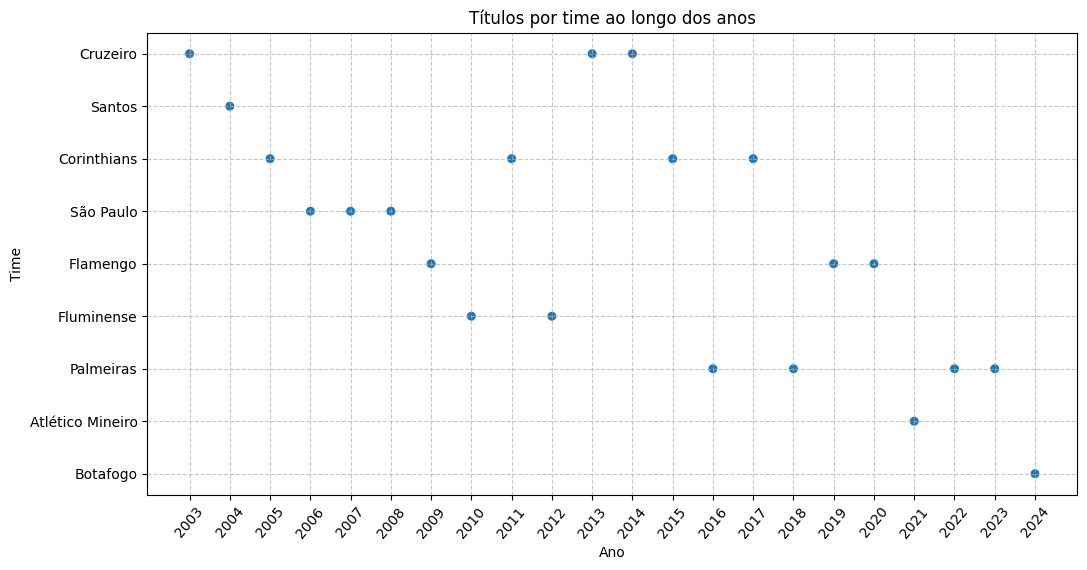

In [84]:
# Supondo que table_data seja seu DataFrame
# Filtra apenas os campeões (place == 1)
champions = table_data[table_data['place'] == 1]

# Conta quantas vezes cada time foi campeão em cada ano
title_counts = champions.groupby(['season', 'team']).size().reset_index(name='titles')

# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.scatterplot(data=title_counts, x='season', y='team', size='titles', sizes=(50, 300), legend=False)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Time')
plt.title('Títulos por time ao longo dos anos')
plt.xticks(sorted(title_counts['season'].unique()), rotation=50)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [71]:
# Filtra apenas os times rebaixados (places 17, 18, 19, 20)
rebaixados = table_data[table_data['place'].isin([17, 18, 19, 20])]

# Conta quantas vezes cada time foi rebaixado em cada ano
rebaixamentos = rebaixados.groupby(['season', 'team']).size().reset_index(name='relegations')

# Ordena os dados por temporada para garantir a contagem correta
rebaixamentos = rebaixamentos.sort_values(by=['team', 'season'])

# Cria uma contagem acumulativa por time
rebaixamentos['total_relegations'] = rebaixamentos.groupby('team')['relegations'].cumsum()

print(rebaixamentos)

    season             team  relegations  total_relegations
32    2011  América Mineiro            1                  1
52    2016  América Mineiro            1                  2
60    2018  América Mineiro            1                  3
80    2023  América Mineiro            1                  4
16    2007       América-RN            1                  1
..     ...              ...          ...                ...
51    2015            Vasco            1                  4
71    2020            Vasco            1                  5
31    2010          Vitória            1                  1
47    2014          Vitória            1                  2
63    2018          Vitória            1                  3

[88 rows x 4 columns]


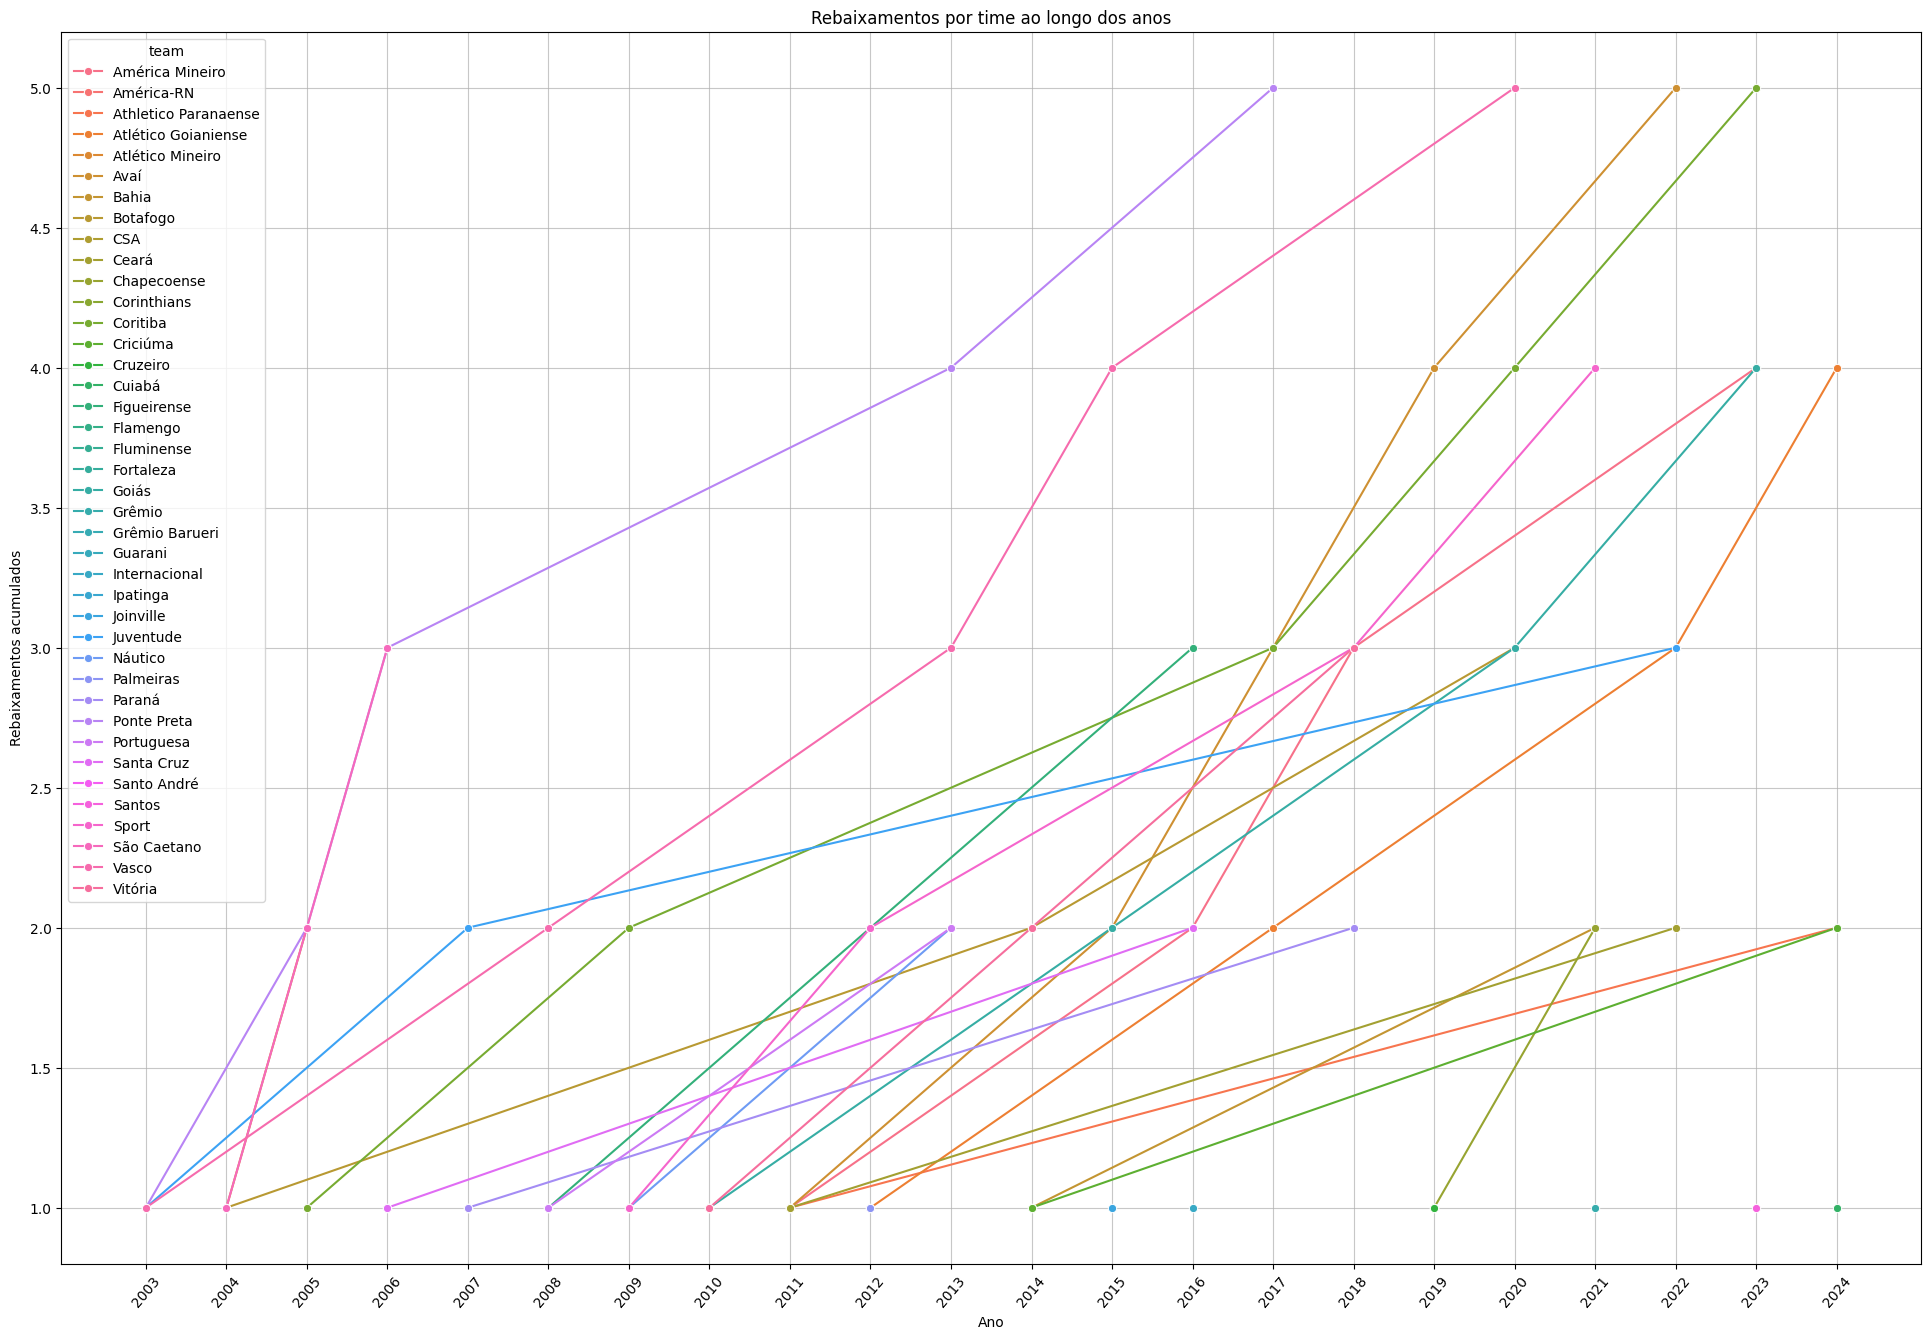

In [76]:

# Criando o gráfico de linhas
plt.figure(figsize=(24, 16))
sns.lineplot(data=rebaixamentos, x='season', y='total_relegations', hue='team', marker='o')

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Rebaixamentos acumulados')
plt.title('Rebaixamentos por time ao longo dos anos')
plt.xticks(sorted(rebaixamentos['season'].unique()), rotation=50)
plt.grid(True, linestyle='-', alpha=0.7)

plt.show()

plt.show()